# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# omsky_gamedev

# Загрузка датасета для регрессии.

In [2]:
models = pd.read_csv('../Data/energy_task_moded.csv')
models

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,year,time
0,60.0,30.0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.60,733.5,92.000000,7.000000,63.000000,5.3,11.0,1.0,2016.0,1020.0
1,60.0,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.48,733.6,92.000000,6.666667,59.166667,5.2,11.0,1.0,2016.0,1030.0
2,50.0,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.37,733.7,92.000000,6.333333,55.333333,5.1,11.0,1.0,2016.0,1040.0
3,50.0,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.25,733.8,92.000000,6.000000,51.500000,5.0,11.0,1.0,2016.0,1050.0
4,60.0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.13,733.9,92.000000,5.666667,47.666667,4.9,11.0,1.0,2016.0,1060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100.0,0.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.70,755.2,55.666667,3.333333,23.666667,13.3,27.0,5.0,2016.0,1040.0
19731,90.0,0.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.60,755.2,56.000000,3.500000,24.500000,13.3,27.0,5.0,2016.0,1050.0
19732,270.0,10.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.50,755.2,56.333333,3.666667,25.333333,13.3,27.0,5.0,2016.0,1060.0
19733,420.0,10.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,22.30,755.2,56.666667,3.833333,26.166667,13.2,27.0,5.0,2016.0,1070.0


# Разбиваем на выборку

In [3]:
X_train, X_test, y_train, y_test = train_test_split(models.drop('Appliances', axis=1), models['Appliances'], test_size=0.7)


# <b>Линейная регресия</b>

## Обычная линейная регресия (без гиппер параметра).

### Обуение

In [4]:
line_regression = LinearRegression().fit(X_train, y_train)
line_regression.predict(X_test)

array([107.60020776, 108.59325998,  49.57655137, ..., 137.32680814,
        78.19080044,  37.8763193 ])

### Значения ошибок: <br>
- средней абсолютной ошибки;
- средней квадраттичной ошибки (MSE);
- средней квадраттичной ошибки под корнем (RMSE);
- средней абсолютной процентной ошибки;

In [5]:
y_predicted = line_regression.predict(X_test)
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {line_regression.score(X_test, y_test)}',
      sep='\n')


MAE: 52.97287483401935
RMSE: 8512.227596977173
MSE: 92.26173419667101
MAPE: 0.7275228853880993
R^2: 0.16294573303574833


### Значение весов.

In [6]:
print(len(line_regression.coef_), line_regression.coef_, sep='\n')


29
[ 2.23830828e+00 -1.83950799e+00  1.37468831e+01 -1.30474987e+01
 -1.04906003e+01  2.39477884e+01  5.04234858e+00 -5.91998284e+00
 -4.05329141e+00 -2.59452735e-01 -6.34447603e-02  6.42449643e+00
 -3.87682603e-02  2.22487203e+00 -1.06153101e+00  6.21076291e+00
 -3.56287321e+00 -1.07035441e+01 -9.95892443e-01 -2.84802605e+00
  7.46539689e-03  8.08084871e-01  1.93691397e+00  1.19956893e-01
 -9.96781028e-01 -2.24169832e-01 -1.20331940e+01  0.00000000e+00
  1.87325827e-02]


### Предварительные результаты

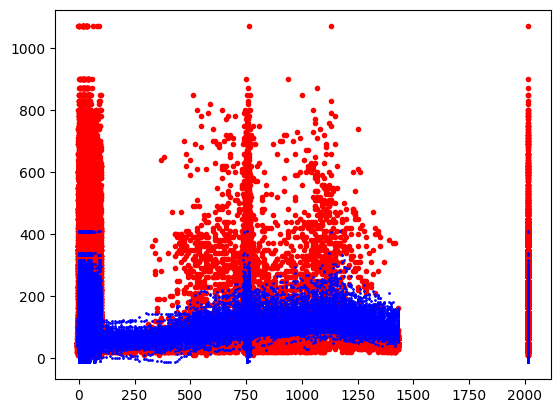

In [7]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, line_regression.predict(X_test), 'bo', markersize=1)

## Ridge (линейная регрессия + L1)

### Ridge - подборка гиппер параметра $\alpha$

In [8]:
ridge_optimal = GridSearchCV(Ridge(), {'alpha': np.arange(166, 167, 0.001)}).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': 166.99900000000477}

### Ridge - обучение с подобранным гиппер параметрам $\alpha$

In [9]:
ridge = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_result = ridge.predict(X_test)
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {ridge.score(X_test, y_test)}',
      sep='\n')
ridge.coef_

MAE: 52.917349920579184
RMSE: 8521.428465010991
MSE: 92.31158359063608
MAPE: 0.9372721953217795
R^2: 0.16204096095819986


array([ 2.26545250e+00, -1.78025355e+00,  1.30449788e+01, -1.09250867e+01,
       -9.50985632e+00,  2.19523209e+01,  5.05156961e+00, -6.06689581e+00,
       -4.06256069e+00, -7.33257874e-01, -6.14248154e-02,  6.06743937e+00,
       -1.65827251e-02,  1.63284198e+00, -1.12161064e+00,  5.72142536e+00,
       -3.51220826e+00, -9.36547012e+00, -8.68847145e-01, -2.73229165e+00,
       -2.05686313e-02,  7.30128450e-01,  1.95924803e+00,  1.20346631e-01,
       -1.10410532e+00, -1.46106515e-01, -9.85025180e+00,  0.00000000e+00,
        1.91314918e-02])

## Lasso (линейная регрессия + L2)

### Lasso - подборка гиппер параметра $\alpha$

In [10]:
lasso_optimal = GridSearchCV(Lasso(), {'alpha': np.arange(0.3, 0.6, 0.001)}).fit(X_train, y_train)
lasso_optimal.best_params_

{'alpha': 0.3}

### Lasso - обучение с подобранным гиппер параметрам $\alpha$

In [11]:
lasso = Lasso(alpha=lasso_optimal.best_params_['alpha']).fit(X_train, y_train)
y_predict = lasso.predict(X_test)
print(f"MAE: {mean_absolute_error(y_predict, y_test)}",
      f'RMSE: {mean_squared_error(y_predict, y_test)}',
      f'MSE: {mean_squared_error(y_predict, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predict, y_test)}',
      f'R^2: {lasso.score(X_test, y_test)}',
      sep='\n')
lasso.coef_

MAE: 52.868344792235796
RMSE: 8516.815293154028
MSE: 92.28659324709103
MAPE: 0.6355021513759435
R^2: 0.16249459957900936


array([ 2.25674831e+00, -5.36029203e-01,  1.34055311e+01, -1.20671885e+01,
       -9.97333016e+00,  2.21920040e+01,  4.76446770e+00, -5.95141156e+00,
       -3.98931524e+00, -2.93278142e-01, -5.64611418e-02,  5.87960508e+00,
       -1.61509051e-02,  4.84368856e-01, -9.95212879e-01,  5.41455467e+00,
       -3.63181801e+00, -8.74947860e+00, -7.34353631e-01, -2.81821462e+00,
       -2.63814413e-02,  6.40935687e-01,  1.81884962e+00,  1.20279701e-01,
       -7.65981078e-01, -1.42429109e-01, -1.01483862e+01,  0.00000000e+00,
        1.89636882e-02])